# Calculating $\pi$ by Monte Carlo

We're now going to calculate $\pi$ using random numbers. This is going to be a longer programming exercise with several parts, so it will be more challenging but will be good practice.

You will see that several of the techniques in the previous notebook will be used again for this task.

The procedure is:
1. Generate points uniformly in a square (so $x$ and $y$ are independent random variables).
2. Calculate their distance from the center of the square.
3. Count the fraction which fall inside a circle.
4. Calculate $\pi$, remember the circle has area $\pi~r^2$, the square has area $4~r^2$.
5. Plot your data with different colours inside and outside the circle.

To find elements of an array that meet some condition, do `arr[arr <= 3]`.
If you want to find the number of times `counts` is equal to 2, do `len(counts[counts == 2])`. We'll learn more about why this works next week.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as stats

The fraction of points which fall inside the circle is 0.785
The value of pi is 3.14


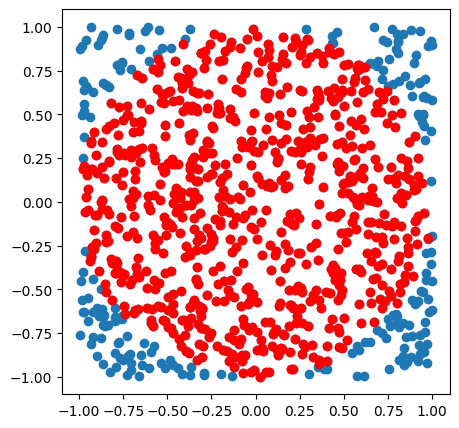

In [ ]:
# Answer below
# Number 1
x_data = rnd.uniform(-1., 1.,size=1000)
y_data = rnd.uniform(-1., 1., size=1000)

# Number 2
r_data = np.sqrt(x_data**2 + y_data**2)

# Number 3
inside_circle = (r_data < 1)
fraction_inside = len(r_data[inside_circle]) / len(r_data)
print('The fraction of points which fall inside the circle is %s' % (fraction_inside))

# Number 4
# Area circle = Fraction of points inside circle x Area of square
# pi * r^2 = fraction_inside * 4 * r^2
# pi = 4 * fraction_inside
pi = 4*fraction_inside
print('The value of pi is %s' % (pi))

# Number 5
plt.figure(figsize=(5,5))
plt.scatter(x_data, y_data)
plt.scatter(x_data[r_data < 1], y_data[r_data < 1], c='r')


## Exercise

Once you get this calculation working, put it in a function. Then see how the accuracy changes with the number of random points that you use.

In [ ]:
# Answer below
def pi(n_points):
  x_data = rnd.uniform(-1., 1.,size=n_points)
  y_data = rnd.uniform(-1., 1., size=n_points)

  r_data = np.sqrt(x_data**2 + y_data**2)

  pi = 4*(len(r_data[r_data < 1]) / len(r_data))
  return pi

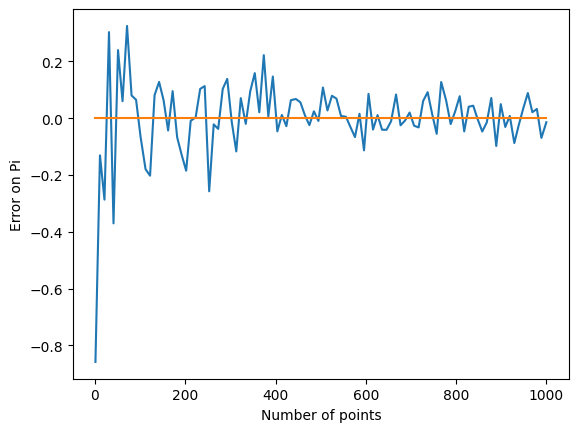

In [ ]:
n = np.linspace(1,1000,100).astype(int)

pi_data = np.zeros(len(n))
for i in range(0,len(n)):
  pi_data[i] = pi(n[i])

diff = np.pi - pi_data

plt.plot(n, diff)
plt.xlabel('Number of points')
plt.ylabel('Error on Pi')
plt.plot(n, np.zeros(len(n)))